# 데이터 표현과 특성

지금까지는 데이터가 2차원 실수형 배열로 각 열이 데이터를 설명하는 **연속형 특성**이라고 가정하였음
하지만 많은 어플리케이션에서 이렇게 데이터가 수집되지 않고, 일반적인 형태는 **범주형 특성**이다.
**범주형 특성**은 보통 숫자값이 아니며, 제품의 브랜드, 색상, 판매분류처럼 범주로 나뉘게 되는 특성들이다.

### 1) 범주형 변수
### 2) 구간 분할
### 3) 상호작용과 다항식
### 4) 일변량 비선형 변환


## 범주형 변수
    예제의 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋
    해당 데이터를 이용하여 어떤 근로자의 수입이 50000달러를 초과하는지 이하인지 예측하려고 함
    데이터셋은 근로자 나이, 고용형태, 교육 수준, 성별, 주당 근로시간, 직업의 특성이 있으며 아래의 표와 같은 데이터를 갖고 있음

In [10]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
import mglearn
%matplotlib inline

import os
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
display(data.head(10))

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


해당 작업은 소득(income)이 <=50k >50k인지 두 클래스로 분류하는 문제로 볼수 있다.
데이터셋에 있는 age와 hours-per-week는 앞서 다뤄본 연속형 특성이나, 
workclass ,education, sex, occupation은 범주형 특성이다.
이런 특성들은 범위가 아닌 고정된 목록을 가진다.
    
    ex) 고용형태의 경우
     - 자영업
     - 공공 근로자
     - 사업체 근로자
 라는 목록중 하나를 값으로 가지며, 정성적인 속성이 된다.
 
 먼저 해당 데이터에 로지스틱 회귀 분류기를 학습시켜 보겠다. 로지스틱 회귀는 다음 공식을 사용하여 y^을 예측한다.
 
 y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
 
 w[i]와 b는 훈련세트로 부터 학습되는 계수이고, x[i]는 입력 특성이다.
그러나 x[i]에는 숫자가 들어가야 하는데, 교육수준은 숫자로 들어갈 수 없다.
이에 따라 데이터를 다른 방식으로 표기해 주어야 함.     

## 원 핫 인코딩
    범주형 변수를 표현하는데 가장 널리 쓰이는 방법
    범주형 변수를 0 또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼 것
    
    pandas을 이용하여 범주형 변수를 인코딩으로 바꿀 수 있음
    먼저 pandas를 이용해 data를 읽어들이겠다.

In [11]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


    데이터셋을 읽은 후, 어떤 범주형 데이터가 있는지 잘 확인한다.
    ex) 남성의 경우 Male이라고 쓸 수 있고 Man이라고 쓸수도 있지만 두 값을 같은 범주로 인식해야 한다.
    
    아래와 같은 코드로 문자열로 된 범주형 데이터를 확인할 수 있다.

In [12]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


    gender의 경우 정확히 두 가지 값으로 되어있기 때문에 원-핫-인코딩으로 나타내기 좋은 형태이다. 
    다만 실제 애플리케이션의 경우 모든 열을 살펴보고 그 값들을 확인해줘야 한다.
    
    pandas의 get_dummies로 객체 타입(문자열 등)이나 범주형을 가진 열을 자동으로 반환해 준다.

In [13]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [14]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


    data_dummiesdml values속성을 이용하여 DataFrame을 npy배열로 바꿀 수 있으며, 이를 이용하여 머신러닝 모델을 학습시킨다.
    학습 전 타깃값을 분리해야한다. (여기서는 income으로 시작하는 2개의 열, 즉 소득이 50k를 넘는지에 대한 답)

In [15]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


총 32561명의 데이터와, 46개의 데이터 중 출력값 파라미터 2개가 빠져 X shape (32561, 44)가 됨
데이터가 scikit-learn에서 사용할 수 있는 형태가 되었으므로 이전과 같은 방식을 사용 할 수 있게 됨.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


### 숫자로 표현된 범주형 특성
    데이터 절약이나 다른 이유로 인하여 범주형 변수가 숫자로 인코딩 된 경우가 많음
    그러나 숫자로 되어 있다고 해도 이산적이기 때문에 연속형 변수로 다루면 안된다는 것이 명확함
    
    방금 활용해본 pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각하기 때문에 가변수를 만들지 않는다.
    대신 어떤 열이 연속형인지 범주형인지 지정할 수 있는 sklearn의 OneHotEncoder를 사용하거나 
    DataFrame의 숫자로 된 열을 문자로 바꿀 수도 있다.
    

In [17]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


    위의 표를 get_dummies로 인코딩하면

In [19]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


문자열 특성만 인코딩 되며 숫자 특성은 바뀌지 않는다.
숫자 특성도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 직접 명시해주어야 한다.

In [20]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 구간분할, 이산화, 그리고선형모델, 트리모델
    데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐만 아니라 어떤 모델을 사용하는지에 따라 달라짐
    2장의 wave 데이터셋을 다시 참조하여, 선형 회귀 모델과 결정 트리 회귀를 비교 

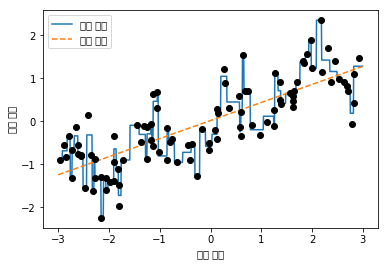

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

    선형 모델은 선형 관계로만 모델링하므로 특성이 하나일 땐 직선으로 나타난다.
    결정 트리는 이 데이터로 훨씬 복잡한 모델을 만들 수 있으나 이는 데이터의 표현 형태에 따라 굉장히 달라진다. 

    한 특성을 여러 특성으로 나누어 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법을 구간 분할(이산화)라고 한다.
    이 특성의 입력값 범위(위의 표에서는 -3에서 3까지)가 나뉘어 여러 구간(ex 10개)로 되어 있다고 가정할경우,
    각 데이터 포인트가 어떤 구간에 속하는지로 나타낼 수 있다.

    다음은 np.linespace로 -3과 3 사이에 같은 간격으로 10개의 구간을 정의한다.

In [23]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


    다음은 각데이터 포인트가 어느 구간에 속하는지 np.digitize 함수를 사용하여 계산하고 기록한다.

In [24]:
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


    이렇게 함으로써 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 인코딩한 범주형 특성으로 변환하였다.
    해당 데이터에 sklearn 모델을 적용하기 위해 OneHotEncoder로 원-핫-인코딩으로 변환해준다.

In [25]:
from sklearn.preprocessing import OneHotEncoder
# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)
# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


    구간을 10개로 정의하였기 때문에 X_binned는 10개의 특성으로 구성된다.
    이제 원-핫-인코딩된 데이터로 선형 회귀 모델과 결정 트리 모델을 새로 만들어보면,

Text(0.5,0,'입력 특성')

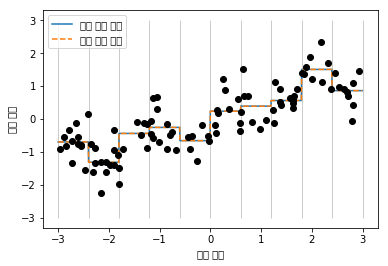

In [27]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

    구간 분할에 의해 선형 회귀 모델과 결정트리가 같은 예측을 만들어내어 파선과 실선이 완전히 겹쳐지게 되었다.
    각 구간안에서는 특성의 값이 상수이므로 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측하게 된다.
    
    구간 분할을 사용하기 전과 비교해보면, 선형 모델은 많이 유연해진데 반해 결정 트리는 덜 유연해졌다.
    트리 모델은 데이터를 자유롭게 나눠 학습할 수 있기 때문에 특성의 값을 구간으로 나누는 것이 득이 되지 않기 때문이다.
    
    다르게 생각하면, 결정트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다. 구간 나누기는 특성마다 따로 해야하지만, 
    결정트리는 한번에 여러 특성을 살필 수 있게된다.
    
    일부 특성과 출력이 비선형 관게가 되지만, 용량이 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할은 모델의 
    성능을 높인는데 좋은 방법이 될 수 있다.

## 상호작용과 다항식
    특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것이다.
    위의 그래프를 다시 보면, 선형 모델은 Wave의 데이터셋의 각 구간에 대해 상숫값을 학습하였다.
    선형 모델은 이런 절편뿐만 아니라 기울기도 학습할 수 있다. 다음은 선형모델에 기울기를 추가한 결과이다.
    
    선형 모델에 기울기는 분할된 데이터에 원래 특성(x축)다시 추가하여 넣어준다.

In [29]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


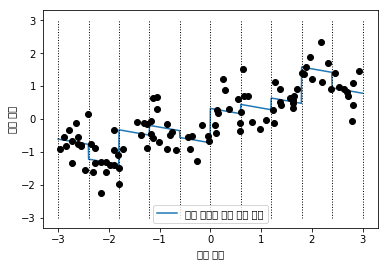

In [30]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

    해당 예시에서 모델은 각 구간의 절편과 기울기를 학습하였다.
    기울기는 음수이고 모든 구간에 걸쳐 동일한, x축 특성이 하나이므로 기울기도 하나가 된다.
    이는 그렇게 유익하지 않은 형태이기 때문에 각 구간에서 다른 기울기를 가지도록 해야한다.
    
    이런 효과를 내기위해서 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있다. 
    이 특성은 구간 특성과 원본 특성의 곱이된다.

(100, 20)


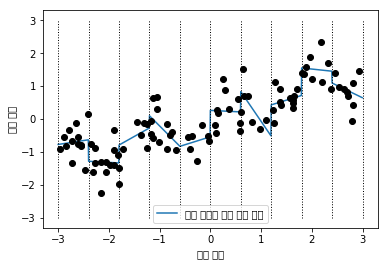

In [31]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

    새로 특성을 적용한 모델에서는 각 구간에서 절편과 기울기가 모두 달라진다.
    
    
    구간 나누기는 연속형 특성을 확장하는 방법 중 하나로 원본 특성의 다항식을 추가하는 방법도 있다.
    특성 x가 주어질 경우, x ** 2, x ** 3, x ** 4등을 시도해볼 수 있게된다.
    
    해당 코드로 10차원을 사용하여 10개의 특성을 만들어본다.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}\n".format(X_poly.shape))

print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [33]:
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


    X_poly의 첫 번째 열은 x와 같고 다른 열은 첫번째 열의 거듭제곱이 된다.
    
    다항식 특성을 선형 모델과 함께 사용하면 다항 회귀 모델이 된다.

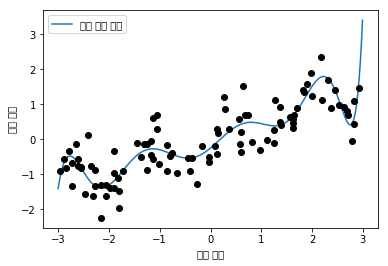

In [34]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

    다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만들게 된다.
    그러나 고차원의 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작하게 된다.
    
    비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습시켜보았다.(이걸 왜 갑자기??? 커널 SVM모델은 또 뭐고??)

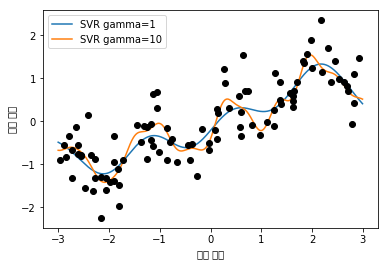

In [35]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

    더 복잡한 모델인 커널  SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을
    만들수 있었습니다.

    상호작용과 다항식을 위해 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용해보았다. 
    데이터를 읽고 MinMaxScaler를 이용하여 스케일을 0에서 1사이로 조정한다.

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    차수를 2로하여 다항식 특성을 뽑는다.

In [39]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}\n\n".format(X_train_poly.shape))

print("다항 특성 이름:\n{}".format(poly.get_feature_names()))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


    이 데이터는 원래 특성이 13개인데 다항식 특성을 추가하여 105개의 특성으로 확장되었다.
    새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함하게 된다.
    어떤 원본 특성이 곱해져 새로운 특성이 만들어졌는지 확인하려면 get_feature_names 메서드를 사용하면 된다.
    
    첫 번째 특성은 상수항, 1이다. 다음 13개의 특성은 원본특성 (x0 ~ x12까지)이다.
    다음 특성은 첫번째 특성의 제곱항과 첫번째 특성과 다른 특성간의 조합이다.
   
    아래 코드는 상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용하여 성능을 비교한 결과이다.

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


    단, 렌덤 포레스트 같은 복잡한 모델일 경우에는 결과가 조금 달라진다.

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.773


## 일변량 비선형 변환
    앞서 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 확인 할 수 있었다.
    위의 다항식 이외에도 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다.
    
    log와 exp함수는 데이터의 스케일을 변경하여 신경망의 성능을 올리는데 도움을 주며,
    sin과 cos함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리하다.
    
    예시로 실제 데이터의 속성과 ㅣ슷한 카운트 데이터를 만들어 보면,

In [42]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


    다음과 같은 데이터가 나온다. 첫번째 특성 맨 앞 10개를 보면 특정한 패턴은 보이지 않는다. 하지만 각 값이 나타난 횟구를 세어보면,

In [43]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


    다음과 같은 분포가 나타나게 된다. 2가 68번으로 가장 많이 나타나며, 큰값의 수는 빠르게 줄어든다.
    그래프로 환산해보면 다음과 같다.

Text(0.5,0,'값')

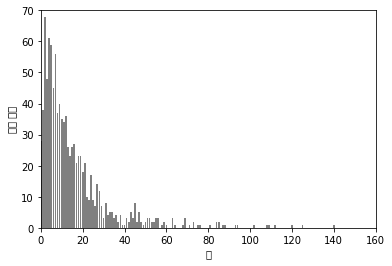

In [45]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

    이런 작은 수치가 많고 큰 수치가 적은 분포는 자주 나타나지만 선형 모델은 이런 데이터를 잘 처리하지 못한다.
    해당 데이터에 릿지 회귀를 적용하면,

In [46]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


    비교적 낮은 점수가 나온다. 하지만 이것을 로그 스케일로 변환하면 성능 향상에 많은 도움이 된다.
    다음은 log(X + 1)을 사용하여 적용해본 결과이다.

테스트 점수: 0.875


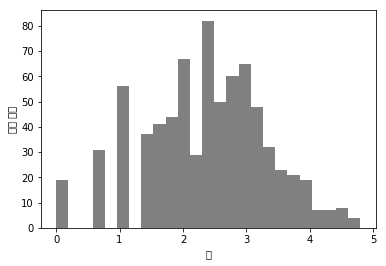

In [47]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

    로그 함수를 적용하기전보다 훨씬 좋은 결과가 나온 것을 확인 할 수 있다.
    위의 예시와 같이 수학 함수들을 활용하면서 데이터셋과 모델의 조합에 최적인 변환 방법을 찾아가는 것이 좋다.
    
    이전 예시들과 같이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 선형 모델 같은 간단한 모델의 성능에 큰 영향을 줄 수 있다.
    반면 트리 기반 모델은 스스로 중요한 상호작용을 찾을 수 있고, 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다.
    이런 모델들은 이따금씩 어느정도 이득은 볼 수 있지만, 선형 모델보다는 영향이 그렇게 크지 않다.